<a href="https://colab.research.google.com/github/wbfrench1/sklearn/blob/main/src/sklearn_ch_4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

## Linear Regression Model

### Simple, One Parameter Model

$\hat{y} = \theta_0 + \theta_1x_1$
<br><br>

$\hat{y}$ is the predicted value

n is the number of features

x is the feature value

$\theta_1$ is the model parameter, while the bias term is $\theta_0$

In [3]:
from sklearn.linear_model import LinearRegression

In [8]:
# get the data
str_data_root = 'https://github.com/ageron/data/raw/main/'
df_lifesat = pd.read_csv(str_data_root + 'lifesat/lifesat.csv')
df_lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [31]:
X = df_lifesat[['GDP per capita (USD)']]
y = df_lifesat[['Life satisfaction']]
x_axis_start = 23500
x_axis_stop =  62500
y_axis_start = 4
y_axis_stop  = 9

#Select the model
model = LinearRegression()
#Train the model
model.fit(X,y)
# Model domain
x_model_domain = np.linspace(x_axis_start, x_axis_stop)
# Model predictions
y_pred = model.predict((x_model_domain).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
theta1 = model.coef_
theta0 = model.intercept_

array([6.77889969e-05])

'6.78 x 10^(-05)'

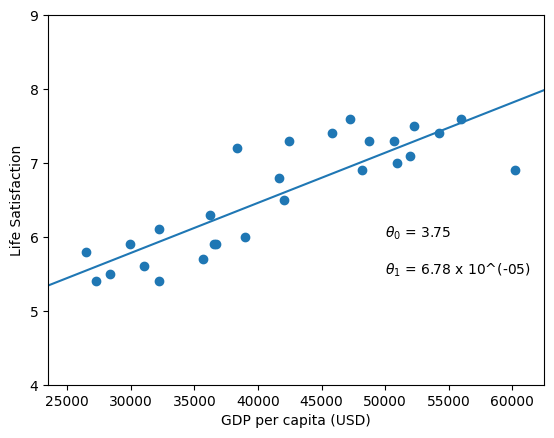

In [64]:
plt.scatter(x=X, y=Y)
plt.plot(x_model_domain, y_pred)
plt.axis([x_axis_start,x_axis_stop,y_axis_start,y_axis_stop])
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.text(50000, 6, r'$\theta_0 $ = {}'.format(round(theta0[0],2)))
plt.text(50000, 5.5, r'$\theta_1 $ = {}'.format(format(theta1[0][0], '.2e').replace('e', ' x 10^(') + ')'))
plt.show()

### Multi-Parameter Model

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\dotsb+ \theta_nx_n $
<br><br>

$\hat{y}$ is the predicted value

n is the number of features

x is the $i^{th}$ feature value

$\theta_j$ is the $j^{th}$  model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, $\dotsc$, $\theta_n$

## Linear Regression Model \(Vectorized Form)

$\mathbf{\hat{y}} = h_\mathbf{θ}(\mathbf{x}) =\mathbf{θ} \cdot \mathbf{x}$

$h_\mathbf{θ}$ is the hypothesis function

$\mathbf{θ}$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

$\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$ with $x_0$ always equal to 1


## Performance Metric- MSE cost function for a linear regression model

$\displaystyle MSE(\mathbf{X}, h_\mathbf{\theta})$ = $\frac{1}{m}\displaystyle\sum_{i=1}^{m}(\theta^\intercal\mathbf{x}^{(i)}-y^{(i)})^2$

In [ ]:
np.random.seed(42)  # to make the example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.rand(m, 1) # column vector

In [ ]:
df = pd.DataFrame(np.concatenate((X,y),axis=1),columns=['X', 'y'])

Text(0.5, 1.0, 'X vs y')

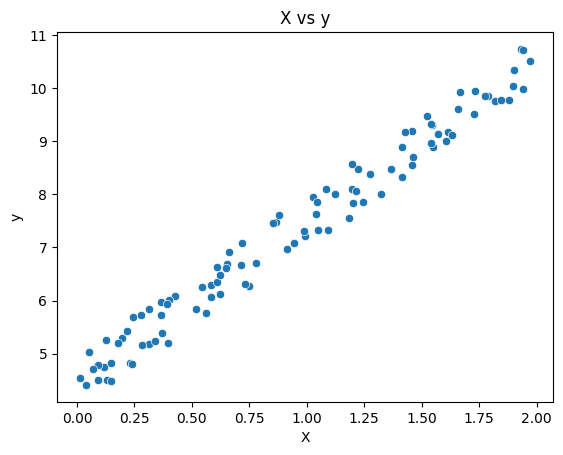

In [ ]:
g = sns.scatterplot(df, x='X', y='y',)
g.set_title('X vs y')

## Batch Gradient Descent

### Partial derivatives of the cost function

$\frac{\partial{}}{\partial \theta_j} \displaystyle{MSE}(\displaystyle{\mathbf{\theta}}) = \frac{2}{m}\displaystyle\sum_{i=1}^{m}(\theta^\intercal\mathbf{x}^{(i)}-y^{(i)})x^{(i)}_j$

### Gradient vector of the cost function

$\nabla_\theta \displaystyle{MSE(\theta)} =
 \begin{pmatrix}
  \frac{\partial{}}{\partial \theta_0}\displaystyle{MSE}(\displaystyle{\mathbf{\theta}}) \\
  \frac{\partial{}}{\partial \theta_1} \displaystyle{MSE}(\displaystyle{\mathbf{\theta}})\\
  \vdots \\
  \frac{\partial{}}{\partial \theta_n} \displaystyle{MSE}(\displaystyle{\mathbf{\theta}})\\
 \end{pmatrix} = \frac{2}{m}\displaystyle{\mathbf{X}}^\intercal(\displaystyle{\mathbf{X\theta}} - \mathbf{y})$

### Gradient descent step
$\mathbf{\theta}^{(next \, step)}  = \mathbf{\theta} -  \eta\nabla_\theta\displaystyle{MSE}(\displaystyle{\mathbf{\theta}})$


In [ ]:
X_b = add_dummy_feature(X) # add X0 = 1 to each instance

eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialized model parameters

In [ ]:
# updates the gradient values
for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.51359766],
       [2.98323418]])

In [ ]:
# input x's -- each one is a complete set of independent variables
print(X_b.shape)
X_b[:3]

(100, 2)


array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788]])

In [ ]:
# predictions
print((X_b @ theta).shape)
(X_b @ theta)[:3]

(100, 1)


array([[ 6.74827942],
       [10.18600448],
       [ 8.88101635]])

In [ ]:
# cost function (predicted value - actual value)
(X_b @ theta - y)[:3]

array([[ 0.46960952],
       [-0.15469177],
       [ 0.17469672]])

In [ ]:
theta

array([[4.51359766],
       [2.98323418]])

## Illustration of various learning rates

In [ ]:
# start off with one learning rate and do the below
# create a list of learning rates
# run a complete set of epochs for each learning rate
## for each epoch save the resulting regression equation
# for each learning rate, graph the set of regression equations
## each equation should have a progressively darker line

In [ ]:
def update_regression_coefs (a_X_b: np.ndarray,
                          a_y: np.ndarray,
                          a_theta: np.ndarray,
                          f_eta: float,
                          ) -> np.ndarray:

    ''' a_X= an np.ndarray containing independent variables
        a_y= an np.ndarray containing dependent variable
        a_theta = an np.ndarray containing the current regression coefficients
        f_eta = a float containing the learning rate for the algorithm

        returns: np.ndarray containing the updated regression line cofficients
    '''

    # updates the gradient values
    a_gradients = 2/m * a_X_b.T @ (a_X_b @ theta - a_y)
    a_theta = theta - f_eta * a_gradients

    return a_theta

In [ ]:
# test new function
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialized model parameters

#
update_regression_coefs(a_X_b= X_b,
                     a_y= y,
                     a_theta= theta,
                     f_eta = 0.1)

array([[1.88715824],
       [1.38804772]])

In [ ]:
# test looping

def train_regression_model (a_X_b: np.ndarray,
                            a_y: np.ndarray,
                            f_eta: float,
                            int_epochs: int,
                            ) -> list:

    ''' a_X= an np.ndarray containing independent variables
        a_y= an np.ndarray containing dependent variable
        f_eta = a float containing the learning rate for the algorithm
        int_epochs= a integer representing number of times

        returns: np.ndarray containing the updated regression line cofficients
    '''

a_thetas= np.empty([1,2])
int_epochs = 1
print('initialized a_thetas:', a_thetas)
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialized model parameters
print('theta random:', theta)
for epoch in range(0, int_epochs):
    theta = update_regression_coefs(a_X_b= X_b,
                                    a_y= y,
                                    a_theta= theta,
                                    f_eta = 0.1
                                    )
    print('theta', theta)
    a_thetas = np.vstack([a_thetas,theta.reshape(1,2)])

print('\n a_thetas:', a_thetas)

initialized a_thetas: [[1.88715824 1.38804772]]
theta random: [[ 0.49671415]
 [-0.1382643 ]]
theta [[1.88715824]
 [1.38804772]]

 a_thetas: [[1.88715824 1.38804772]
 [1.88715824 1.38804772]]


In [ ]:
a_thetas.reshape(2,3)

array([[1.88715824, 1.38804772, 1.88715824],
       [1.38804772, 1.88715824, 1.38804772]])

In [ ]:
# generates equally spaced x's in (0,2) as a row vector
X_1 = np.linspace(0,2)
X_1

array([0.        , 0.04081633, 0.08163265, 0.12244898, 0.16326531,
       0.20408163, 0.24489796, 0.28571429, 0.32653061, 0.36734694,
       0.40816327, 0.44897959, 0.48979592, 0.53061224, 0.57142857,
       0.6122449 , 0.65306122, 0.69387755, 0.73469388, 0.7755102 ,
       0.81632653, 0.85714286, 0.89795918, 0.93877551, 0.97959184,
       1.02040816, 1.06122449, 1.10204082, 1.14285714, 1.18367347,
       1.2244898 , 1.26530612, 1.30612245, 1.34693878, 1.3877551 ,
       1.42857143, 1.46938776, 1.51020408, 1.55102041, 1.59183673,
       1.63265306, 1.67346939, 1.71428571, 1.75510204, 1.79591837,
       1.83673469, 1.87755102, 1.91836735, 1.95918367, 2.        ])

In [ ]:
#reshapes the row vector as a column vector
X_1 = X_1.reshape(-1,1)
X_1

array([[0.        ],
       [0.04081633],
       [0.08163265],
       [0.12244898],
       [0.16326531],
       [0.20408163],
       [0.24489796],
       [0.28571429],
       [0.32653061],
       [0.36734694],
       [0.40816327],
       [0.44897959],
       [0.48979592],
       [0.53061224],
       [0.57142857],
       [0.6122449 ],
       [0.65306122],
       [0.69387755],
       [0.73469388],
       [0.7755102 ],
       [0.81632653],
       [0.85714286],
       [0.89795918],
       [0.93877551],
       [0.97959184],
       [1.02040816],
       [1.06122449],
       [1.10204082],
       [1.14285714],
       [1.18367347],
       [1.2244898 ],
       [1.26530612],
       [1.30612245],
       [1.34693878],
       [1.3877551 ],
       [1.42857143],
       [1.46938776],
       [1.51020408],
       [1.55102041],
       [1.59183673],
       [1.63265306],
       [1.67346939],
       [1.71428571],
       [1.75510204],
       [1.79591837],
       [1.83673469],
       [1.87755102],
       [1.918

In [ ]:
# add a dummy variable, 1, to permit the constant to work
X_1 = add_dummy_feature(X_1)
X_1

array([[1.        , 0.        ],
       [1.        , 0.04081633],
       [1.        , 0.08163265],
       [1.        , 0.12244898],
       [1.        , 0.16326531],
       [1.        , 0.20408163],
       [1.        , 0.24489796],
       [1.        , 0.28571429],
       [1.        , 0.32653061],
       [1.        , 0.36734694],
       [1.        , 0.40816327],
       [1.        , 0.44897959],
       [1.        , 0.48979592],
       [1.        , 0.53061224],
       [1.        , 0.57142857],
       [1.        , 0.6122449 ],
       [1.        , 0.65306122],
       [1.        , 0.69387755],
       [1.        , 0.73469388],
       [1.        , 0.7755102 ],
       [1.        , 0.81632653],
       [1.        , 0.85714286],
       [1.        , 0.89795918],
       [1.        , 0.93877551],
       [1.        , 0.97959184],
       [1.        , 1.02040816],
       [1.        , 1.06122449],
       [1.        , 1.10204082],
       [1.        , 1.14285714],
       [1.        , 1.18367347],
       [1.

In [ ]:
X_1.shape

(50, 2)

In [ ]:
# y = x + b
X_1[0]

array([1., 0.])

In [ ]:
a_thetas[0]

array([1.88715824, 1.38804772])

In [ ]:
X_1[0] @ a_thetas[0]

1.8871582438567767

In [ ]:
# y = x + b
X_1[1]

array([1.        , 0.04081633])

In [ ]:
a_thetas[1]

array([1.88715824, 1.38804772])

In [ ]:
X_1[0] @ a_thetas[0]

1.8871582438567767

In [ ]:
a_thetas

array([[1.88715824, 1.38804772],
       [1.88715824, 1.38804772],
       [2.71245651, 2.27593617],
       [3.2057079 , 2.78934668]])